## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9677265	total: 49.9ms	remaining: 49.9s
1:	learn: 0.9354847	total: 50.8ms	remaining: 25.3s
2:	learn: 0.9084145	total: 51.6ms	remaining: 17.2s
3:	learn: 0.8776572	total: 52.7ms	remaining: 13.1s
4:	learn: 0.8531849	total: 52.9ms	remaining: 10.5s
5:	learn: 0.8252950	total: 54.6ms	remaining: 9.04s
6:	learn: 0.8031271	total: 56.4ms	remaining: 8s
7:	learn: 0.7799510	total: 57.5ms	remaining: 7.13s
8:	learn: 0.7539502	total: 58.4ms	remaining: 6.43s
9:	learn: 0.7304335	total: 60.2ms	remaining: 5.96s
10:	learn: 0.7075025	total: 63.8ms	remaining: 5.73s
11:	learn: 0.6845907	total: 64.2ms	remaining: 5.29s
12:	learn: 0.6661844	total: 65ms	remaining: 4.93s
13:	learn: 0.6467304	total: 65.8ms	remaining: 4.63s
14:	learn: 0.6263344	total: 66.5ms	remaining: 4.37s
15:	learn: 0.6078899	total: 67.3ms	remaining: 4.14s
16:	learn: 0.5888549	total: 69ms	remaining: 3.99s
17:	learn: 0.5707761	total: 69.8ms	remaining: 3.81s
18:	learn: 0.5566066	total: 71.2ms	remaining: 3.68s

94:	learn: 0.0937559	total: 160ms	remaining: 1.52s
95:	learn: 0.0918039	total: 161ms	remaining: 1.51s
96:	learn: 0.0906430	total: 163ms	remaining: 1.51s
97:	learn: 0.0886417	total: 164ms	remaining: 1.51s
98:	learn: 0.0871663	total: 166ms	remaining: 1.51s
99:	learn: 0.0861233	total: 168ms	remaining: 1.51s
100:	learn: 0.0854475	total: 170ms	remaining: 1.51s
101:	learn: 0.0839565	total: 171ms	remaining: 1.5s
102:	learn: 0.0827824	total: 171ms	remaining: 1.49s
103:	learn: 0.0819128	total: 172ms	remaining: 1.49s
104:	learn: 0.0806631	total: 174ms	remaining: 1.48s
105:	learn: 0.0796184	total: 175ms	remaining: 1.47s
106:	learn: 0.0785407	total: 177ms	remaining: 1.48s
107:	learn: 0.0779771	total: 177ms	remaining: 1.46s
108:	learn: 0.0767428	total: 181ms	remaining: 1.48s
109:	learn: 0.0758109	total: 181ms	remaining: 1.46s
110:	learn: 0.0744324	total: 182ms	remaining: 1.46s
111:	learn: 0.0732151	total: 183ms	remaining: 1.45s
112:	learn: 0.0721632	total: 184ms	remaining: 1.44s
113:	learn: 0.07096

177:	learn: 0.0464741	total: 242ms	remaining: 1.12s
178:	learn: 0.0463873	total: 243ms	remaining: 1.12s
179:	learn: 0.0461852	total: 244ms	remaining: 1.11s
180:	learn: 0.0460306	total: 246ms	remaining: 1.11s
181:	learn: 0.0459366	total: 246ms	remaining: 1.11s
182:	learn: 0.0457847	total: 248ms	remaining: 1.11s
183:	learn: 0.0455083	total: 249ms	remaining: 1.1s
184:	learn: 0.0453182	total: 250ms	remaining: 1.1s
185:	learn: 0.0452033	total: 251ms	remaining: 1.1s
186:	learn: 0.0450598	total: 252ms	remaining: 1.09s
187:	learn: 0.0448810	total: 252ms	remaining: 1.09s
188:	learn: 0.0447483	total: 253ms	remaining: 1.09s
189:	learn: 0.0445595	total: 254ms	remaining: 1.08s
190:	learn: 0.0442336	total: 254ms	remaining: 1.08s
191:	learn: 0.0440662	total: 255ms	remaining: 1.07s
192:	learn: 0.0439080	total: 255ms	remaining: 1.06s
193:	learn: 0.0437907	total: 255ms	remaining: 1.06s
194:	learn: 0.0436394	total: 255ms	remaining: 1.05s
195:	learn: 0.0434982	total: 256ms	remaining: 1.05s
196:	learn: 0.0

324:	learn: 0.0304067	total: 398ms	remaining: 827ms
325:	learn: 0.0303080	total: 401ms	remaining: 829ms
326:	learn: 0.0302646	total: 402ms	remaining: 826ms
327:	learn: 0.0301725	total: 403ms	remaining: 826ms
328:	learn: 0.0300920	total: 404ms	remaining: 825ms
329:	learn: 0.0300210	total: 405ms	remaining: 823ms
330:	learn: 0.0299564	total: 406ms	remaining: 821ms
331:	learn: 0.0299160	total: 407ms	remaining: 819ms
332:	learn: 0.0298293	total: 408ms	remaining: 818ms
333:	learn: 0.0297510	total: 409ms	remaining: 816ms
334:	learn: 0.0296899	total: 411ms	remaining: 816ms
335:	learn: 0.0296628	total: 412ms	remaining: 814ms
336:	learn: 0.0295805	total: 413ms	remaining: 812ms
337:	learn: 0.0295534	total: 413ms	remaining: 810ms
338:	learn: 0.0294987	total: 414ms	remaining: 808ms
339:	learn: 0.0294533	total: 415ms	remaining: 806ms
340:	learn: 0.0294202	total: 416ms	remaining: 804ms
341:	learn: 0.0293686	total: 417ms	remaining: 802ms
342:	learn: 0.0292518	total: 417ms	remaining: 799ms
343:	learn: 

445:	learn: 0.0248792	total: 540ms	remaining: 671ms
446:	learn: 0.0248243	total: 541ms	remaining: 670ms
447:	learn: 0.0248047	total: 542ms	remaining: 668ms
448:	learn: 0.0247700	total: 543ms	remaining: 666ms
449:	learn: 0.0247517	total: 544ms	remaining: 664ms
450:	learn: 0.0247235	total: 544ms	remaining: 662ms
451:	learn: 0.0246973	total: 545ms	remaining: 661ms
452:	learn: 0.0246676	total: 546ms	remaining: 659ms
453:	learn: 0.0246500	total: 547ms	remaining: 658ms
454:	learn: 0.0245914	total: 548ms	remaining: 656ms
455:	learn: 0.0245772	total: 549ms	remaining: 655ms
456:	learn: 0.0245481	total: 549ms	remaining: 653ms
457:	learn: 0.0245037	total: 550ms	remaining: 651ms
458:	learn: 0.0244467	total: 551ms	remaining: 650ms
459:	learn: 0.0244271	total: 552ms	remaining: 648ms
460:	learn: 0.0243957	total: 553ms	remaining: 646ms
461:	learn: 0.0243134	total: 553ms	remaining: 644ms
462:	learn: 0.0242635	total: 554ms	remaining: 643ms
463:	learn: 0.0242466	total: 555ms	remaining: 642ms
464:	learn: 

582:	learn: 0.0210607	total: 670ms	remaining: 479ms
583:	learn: 0.0210503	total: 673ms	remaining: 479ms
584:	learn: 0.0210384	total: 673ms	remaining: 478ms
585:	learn: 0.0210065	total: 674ms	remaining: 476ms
586:	learn: 0.0209994	total: 675ms	remaining: 475ms
587:	learn: 0.0209633	total: 676ms	remaining: 474ms
588:	learn: 0.0209279	total: 677ms	remaining: 472ms
589:	learn: 0.0208854	total: 677ms	remaining: 471ms
590:	learn: 0.0208503	total: 678ms	remaining: 469ms
591:	learn: 0.0208355	total: 679ms	remaining: 468ms
592:	learn: 0.0208258	total: 680ms	remaining: 467ms
593:	learn: 0.0208150	total: 681ms	remaining: 466ms
594:	learn: 0.0207962	total: 682ms	remaining: 464ms
595:	learn: 0.0207838	total: 683ms	remaining: 463ms
596:	learn: 0.0207509	total: 684ms	remaining: 461ms
597:	learn: 0.0207274	total: 685ms	remaining: 460ms
598:	learn: 0.0207005	total: 685ms	remaining: 459ms
599:	learn: 0.0206730	total: 686ms	remaining: 458ms
600:	learn: 0.0206483	total: 687ms	remaining: 456ms
601:	learn: 

746:	learn: 0.0177691	total: 823ms	remaining: 279ms
747:	learn: 0.0177602	total: 825ms	remaining: 278ms
748:	learn: 0.0177322	total: 826ms	remaining: 277ms
749:	learn: 0.0177162	total: 827ms	remaining: 276ms
750:	learn: 0.0176982	total: 829ms	remaining: 275ms
751:	learn: 0.0176813	total: 830ms	remaining: 274ms
752:	learn: 0.0176739	total: 830ms	remaining: 272ms
753:	learn: 0.0176575	total: 831ms	remaining: 271ms
754:	learn: 0.0176279	total: 832ms	remaining: 270ms
755:	learn: 0.0176079	total: 833ms	remaining: 269ms
756:	learn: 0.0175876	total: 836ms	remaining: 268ms
757:	learn: 0.0175672	total: 839ms	remaining: 268ms
758:	learn: 0.0175561	total: 842ms	remaining: 267ms
759:	learn: 0.0175398	total: 843ms	remaining: 266ms
760:	learn: 0.0175360	total: 847ms	remaining: 266ms
761:	learn: 0.0175337	total: 850ms	remaining: 265ms
762:	learn: 0.0175023	total: 855ms	remaining: 266ms
763:	learn: 0.0174792	total: 857ms	remaining: 265ms
764:	learn: 0.0174718	total: 858ms	remaining: 264ms
765:	learn: 

867:	learn: 0.0160066	total: 968ms	remaining: 147ms
868:	learn: 0.0159886	total: 970ms	remaining: 146ms
869:	learn: 0.0159669	total: 971ms	remaining: 145ms
870:	learn: 0.0159446	total: 972ms	remaining: 144ms
871:	learn: 0.0159270	total: 972ms	remaining: 143ms
872:	learn: 0.0159233	total: 974ms	remaining: 142ms
873:	learn: 0.0159138	total: 974ms	remaining: 140ms
874:	learn: 0.0158986	total: 975ms	remaining: 139ms
875:	learn: 0.0158750	total: 976ms	remaining: 138ms
876:	learn: 0.0158651	total: 977ms	remaining: 137ms
877:	learn: 0.0158626	total: 977ms	remaining: 136ms
878:	learn: 0.0158483	total: 988ms	remaining: 136ms
879:	learn: 0.0158270	total: 989ms	remaining: 135ms
880:	learn: 0.0158184	total: 991ms	remaining: 134ms
881:	learn: 0.0158104	total: 992ms	remaining: 133ms
882:	learn: 0.0158021	total: 994ms	remaining: 132ms
883:	learn: 0.0157968	total: 995ms	remaining: 131ms
884:	learn: 0.0157766	total: 997ms	remaining: 130ms
885:	learn: 0.0157668	total: 997ms	remaining: 128ms
886:	learn: 

975:	learn: 0.0146139	total: 1.11s	remaining: 27.3ms
976:	learn: 0.0146086	total: 1.11s	remaining: 26.2ms
977:	learn: 0.0145774	total: 1.11s	remaining: 25.1ms
978:	learn: 0.0145660	total: 1.11s	remaining: 23.9ms
979:	learn: 0.0145469	total: 1.12s	remaining: 22.8ms
980:	learn: 0.0145226	total: 1.12s	remaining: 21.6ms
981:	learn: 0.0145086	total: 1.12s	remaining: 20.5ms
982:	learn: 0.0144936	total: 1.12s	remaining: 19.4ms
983:	learn: 0.0144699	total: 1.12s	remaining: 18.2ms
984:	learn: 0.0144265	total: 1.12s	remaining: 17.1ms
985:	learn: 0.0144152	total: 1.12s	remaining: 16ms
986:	learn: 0.0144085	total: 1.13s	remaining: 14.8ms
987:	learn: 0.0144001	total: 1.13s	remaining: 13.7ms
988:	learn: 0.0143934	total: 1.13s	remaining: 12.5ms
989:	learn: 0.0143904	total: 1.13s	remaining: 11.4ms
990:	learn: 0.0143734	total: 1.13s	remaining: 10.3ms
991:	learn: 0.0143519	total: 1.13s	remaining: 9.12ms
992:	learn: 0.0143426	total: 1.13s	remaining: 7.98ms
993:	learn: 0.0143261	total: 1.13s	remaining: 6.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.01771633476716811
ABC Pre-generator MAE 1.0009766251558896


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

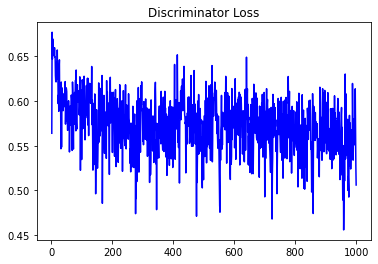

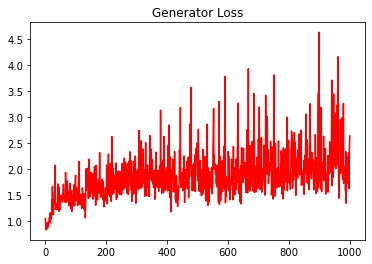

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.049613541727522754


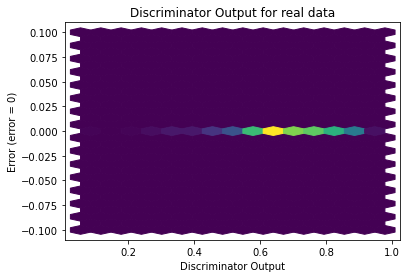

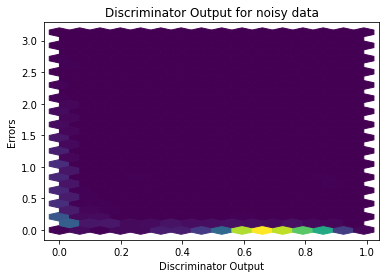

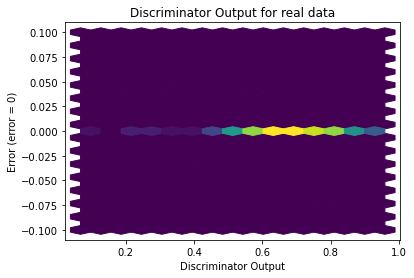

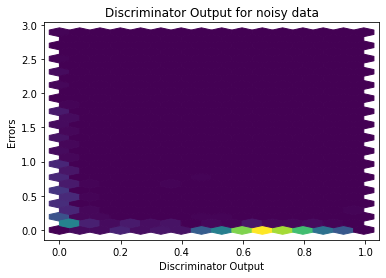

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


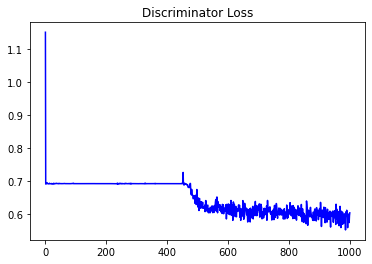

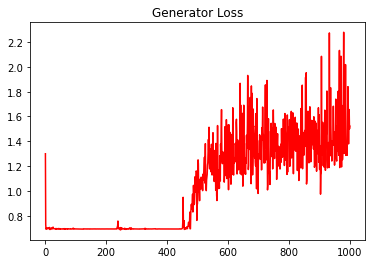

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.08943576514527395


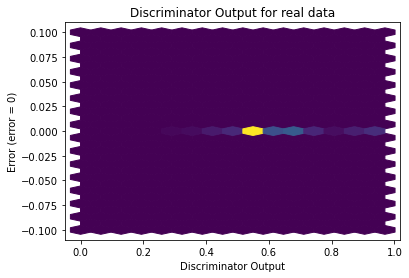

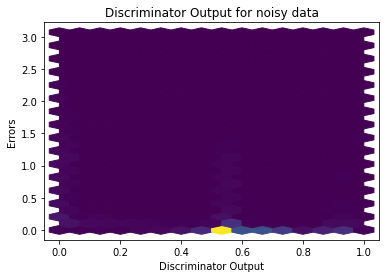

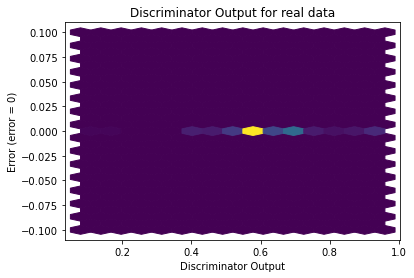

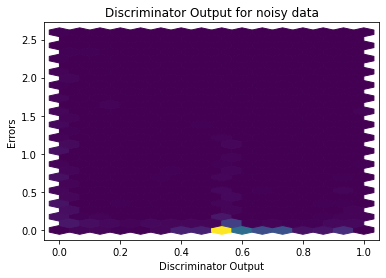

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


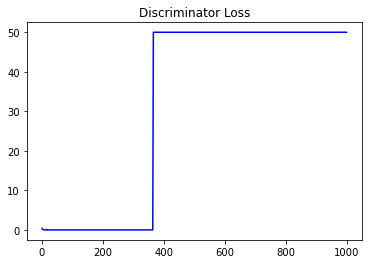

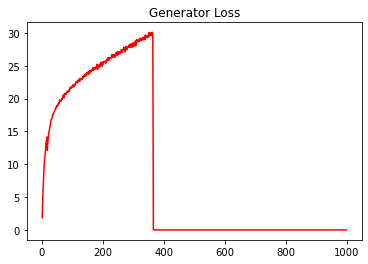

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
4.283038937356565


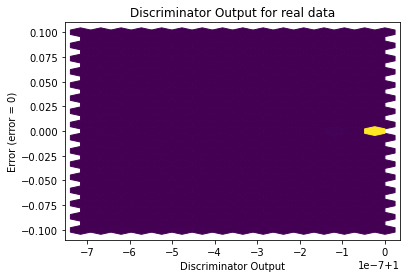

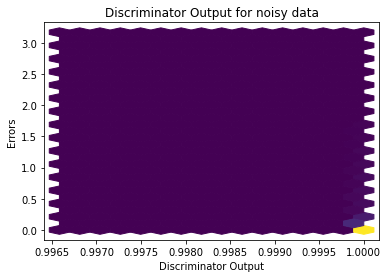

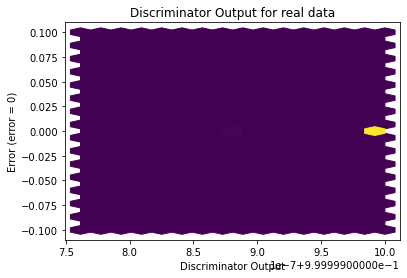

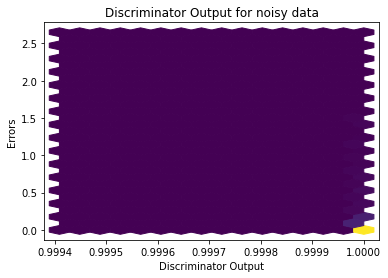

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0452]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1795]], requires_grad=True)
